<a href="https://colab.research.google.com/github/kamil-git-del/intern/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective**
Predict Handwritten Digits (0–9) Using the MNIST Dataset and a Convolutional Neural Network (CNN).

Import **Libraries**

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.17.0


Load the **Dataset**

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Print shapes
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


Describe the **Data**

In [3]:
# Print unique labels (digits)
print("Unique labels in the dataset:", np.unique(train_labels))


Unique labels in the dataset: [0 1 2 3 4 5 6 7 8 9]


 Data **Visualization**

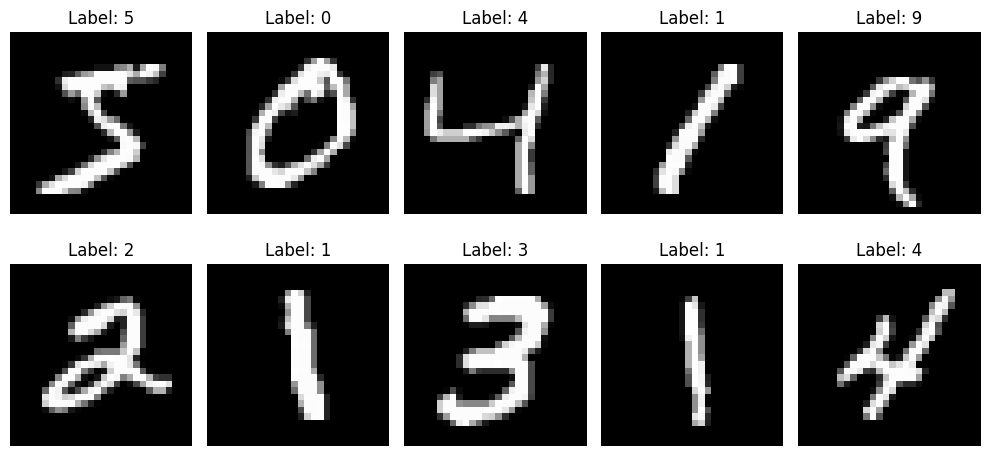

In [4]:
# Plot some of the training images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Data **Preprocessing**

In [5]:
# Normalize the images to a pixel value range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape data to add an extra dimension for the CNN (28x28x1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Check the new shape of the data
print("Train images reshaped:", train_images.shape)
print("Test images reshaped:", test_images.shape)


Train images reshaped: (60000, 28, 28, 1)
Test images reshaped: (10000, 28, 28, 1)


Building the CNN **Model**

In [6]:
# Build the CNN model
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the output and feed it into a dense layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer (10 digits)
])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Train-Test **Split**

In [9]:
# Split training data into train and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Check shapes
print("Train images shape:", train_images.shape)
print("Validation images shape:", val_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation labels shape:", val_labels.shape)


Train images shape: (48000, 28, 28, 1)
Validation images shape: (12000, 28, 28, 1)
Train labels shape: (48000,)
Validation labels shape: (12000,)


Compile the **Model**

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Train the **Model**

In [10]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(val_images, val_labels))


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.8726 - loss: 0.3951 - val_accuracy: 0.9829 - val_loss: 0.0535
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9841 - loss: 0.0530 - val_accuracy: 0.9858 - val_loss: 0.0491
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9888 - loss: 0.0373 - val_accuracy: 0.9876 - val_loss: 0.0417
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9921 - loss: 0.0253 - val_accuracy: 0.9873 - val_loss: 0.0455
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9935 - loss: 0.0191 - val_accuracy: 0.9883 - val_loss: 0.0448
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - accuracy: 0.9949 - loss: 0.0158 - val_accuracy: 0.9853 - val_loss: 0.0519
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 35ms/step - accuracy: 0.9958 - loss: 0.0128 - val_accuracy: 0.9862 - val_loss: 0.0510
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9966 -

 Visualize Training **Performance**

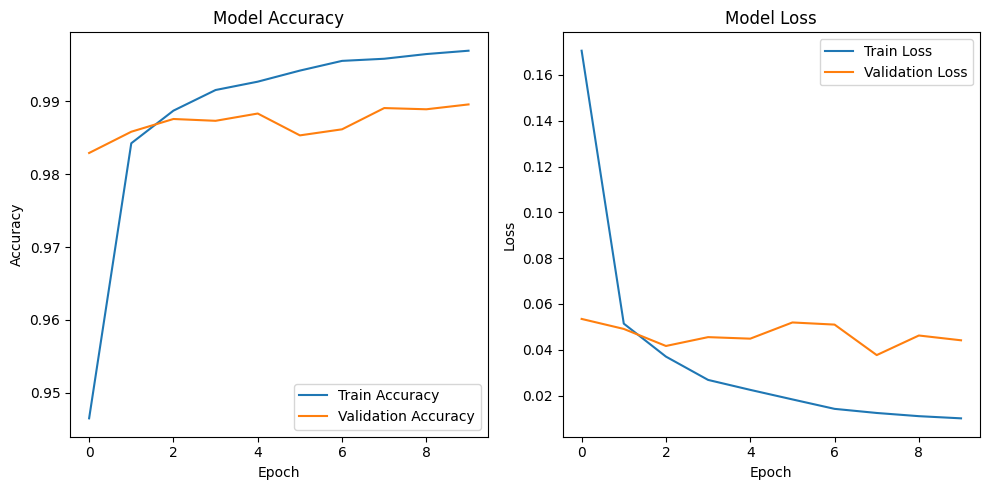

In [11]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


Evaluate the Model on Test **Data**

In [12]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)


313/313 - 4s - 13ms/step - accuracy: 0.9919 - loss: 0.0318

Test accuracy: 0.9919000267982483


Make Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


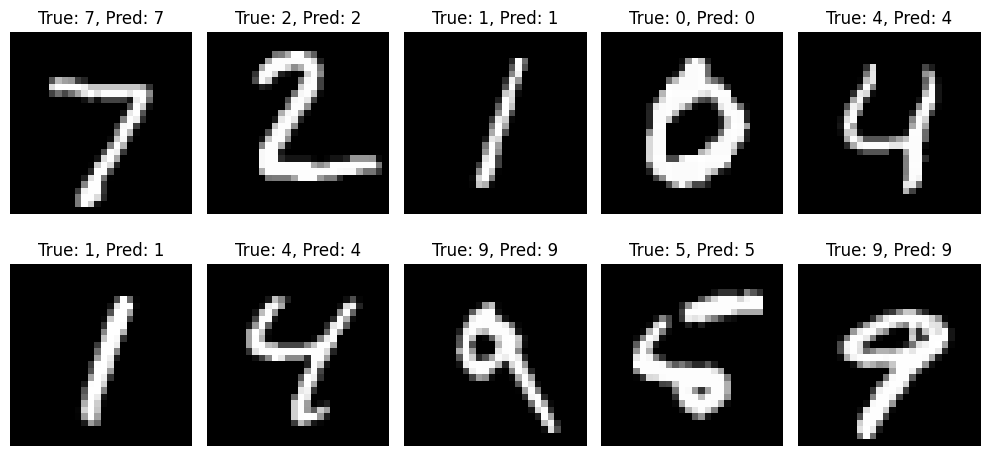

In [13]:
# Make predictions on test images
predictions = model.predict(test_images)

# Display a few test images with their predicted labels
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {test_labels[i]}, Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


**Conclusion:**
*We* built and trained a CNN to predict handwritten digits.
Achieved high accuracy on the test set.
Visualized predictions on a subset of test images.
You can further optimize the model by tuning hyperparameters or increasing the number of epochs for better accuracy.